# Semantic Sentence Similarity

## Can you identify Sentence pairs that have the same intent?

The goal of this competition is to predict which of the provided pairs of questions contain two questions with the same meaning. The ground truth is the set of labels that have been supplied by human experts. The ground truth labels are inherently subjective, as the true meaning of sentences can never be known with certainty. Human labeling is also a 'noisy' process, and reasonable people will disagree. As a result, the ground truth labels on this dataset should be taken to be 'informed' but not 100% accurate, and may include incorrect labeling. We believe the labels, on the whole, to represent a reasonable consensus, but this may often not be true on a case by case basis for individual items in the dataset.

Please note: as an anti-cheating measure, Kaggle has supplemented the test set with computer-generated question pairs. Those rows do not come from Quora, and are not counted in the scoring. All of the questions in the training set are genuine examples from Quora.

# Data fields

id - the id of a training set question pair  
qid1, qid2 - unique ids of each question (only available in train.csv)  
question1, question2 - the full text of each question  
is_duplicate - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from wordcloud import WordCloud

In [3]:
import nltk
from nltk import word_tokenize
import re
import sys
from IPython.core.display import clear_output
from time import sleep,time
from nltk.corpus import stopwords

In [4]:
df=pd.read_csv("E://DATA Science//Datasets//Kaggle//Quora//train.csv")

In [ ]:
df1.iloc[3306]

# EDA
reference: https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb

In [24]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.shape

In [ ]:
sns.countplot(x=df['is_duplicate'])

In [ ]:
print("number of question pair: {}".format(len(df)))
print("Duplicate pair: {}".format(round(df['is_duplicate'].mean()*100,2)))
qids=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print("Number of duplicate Questions: {}".format(len(qids.unique())))
print("Number of questions that appears multiple times:{}".format(np.sum(qids.value_counts()>1)))

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(qids.value_counts(),bins=50)
plt.yscale('log',nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')

In [ ]:
train_qs=pd.Series(df['question1'].tolist()+df['question2'].tolist())
cloud=WordCloud(width=1200,height=1080).generate(" ".join(train_qs.astype(str)))

plt.figure(figsize=(20,15))
plt.imshow(cloud)

# Text Cleaning

reference: https://www.kaggle.com/currie32/the-importance-of-cleaning-text

In [ ]:
df.head()

In [ ]:
list_q1=list(df['question1'])
list_q2=list(df['question2'])

In [ ]:
for i in range(len(list_q1)):
    list_q1[i]=str(df['question1'][i])
    list_q2[i]=str(df['question2'][i])

In [ ]:
q1_corpus=" ".join(list_q1)
q2_corpus=" ".join(list_q2)

In [ ]:
q1_words=q1_corpus.split()
q2_words=q2_corpus.split()

In [ ]:
def text2df(text):
    words=text.split()
    wordcount=dict()
    
    for i in range(len(words)):
        if words[i] not in wordcount.keys():
            wordcount[words[i]]=1
        else:
            wordcount[words[i]]+=1
    words=list(wordcount.keys())
    count=list(wordcount.values())
    
    df=pd.DataFrame(zip(words,count),columns=["Words","Count"])
    
    return df

In [ ]:
word_couont=text2df(q1_corpus)
word_couont.sort_values(by=['Count'],ascending=False,inplace=True)
word_couont.reset_index(drop=True,inplace=True)

In [ ]:
df['q1_words']=0
df['q2_words']=0
list_1=[]
list_2=[]
for i in range(len(df)):
    list_1.append(len(str(df['question1'][i]).split()))
    list_2.append(len(str(df['question2'][i]).split()))
df['q1_words']=list_1 
df['q2_words']=list_2

In [ ]:
df.head()

In [ ]:
df=pd.read_csv("E://DATA Science//Datasets//Kaggle//Quora//train_3.csv")

In [ ]:
list_len_1=[]
list_len_2=[]
for i in range(len(df)):
    list_len_1.append(len(str(df['question1'][i])))
    list_len_2.append(len(str(df['question2'][i])))

In [ ]:
list_len=list(set(list_len_1+list_len_2))

In [ ]:
list_0=[]
for i in range(len(df)):
    if list_len_1[i]<=3 or list_len_2[i]<=3:
        list_0.append(i)

In [ ]:
df.drop(list_0,inplace=True,axis=0)

In [ ]:
df.reset_index(inplace=True)

In [5]:
def text2find(df,col,word):
    india_list=[]
    for i in range(len(df)):
        check_s=re.findall(word,str(df[col][i]).lower())
        if len(check_s)>0:
            if check_s[0]==word:
                india_list.append(i)
    return india_list   
def show_question(list_,range_,df):
    for i in range(range_):
        i=list_[i]
        print(df['question1'][i]," ",df['is_duplicate'][i],"\n",df['question2'][i]," ",df['is_duplicate'][i],"\n")

In [ ]:
math_list=text2find(df,'question1','math]')

In [ ]:
show_question(math_list,400)

In [ ]:
df['len_def']=0
list_2=[]
for i in range(len(df)):
    l1=len(str(df['question1'][i]))
    l2=len(str(df['question2'][i]))
    list_2.append(abs(l1-l2))
df['len_def']=list_2

In [ ]:
df['new_ld']=0
list_1=[]
for i in range(len(df)):
    if df['len_def'][i]>=0 and df['len_def'][i]<10:
        list_1.append(1)
    elif df['len_def'][i]>=10 and df['len_def'][i]<20:
        list_1.append(2)
    elif df['len_def'][i]>=20 and df['len_def'][i]<30:
        list_1.append(3)
    elif df['len_def'][i]>=30 and df['len_def'][i]<40:
        list_1.append(4)
    elif df['len_def'][i]>=40 and df['len_def'][i]<50:
        list_1.append(5)
    elif df['len_def'][i]>=50 and df['len_def'][i]<100:
        list_1.append(6)
    elif df['len_def'][i]>=100 and df['len_def'][i]<=1080:
        list_1.append(7)
df['new_ld']=list_1       

# Absolute difference between two question

# Conclusion:-

### Fro the below stacked bar chart we can easily say that if the difference between two questions is greater than 50 than it' more likely that questions will be dissimilar

In [ ]:
sns.countplot(df['new_ld'],hue=df['is_duplicate'])

In [ ]:
df['total_words']=0
list_1=[]
for i in range(len(df)):
    list_1.append(df['q1_words'][i]+df['q2_words'][i])
df['total_words']=list_1

In [ ]:
df['word_share']=0.0
list_word_share=[]
for i in range(len(df)):
    list_word_share.append(round(float(df['common_token'][i]/df['total_words'][i]),2))
df['word_share']=list_word_share

In [ ]:
df.head()

In [1]:
def var2hist(df,col):
    set1=list(df[df['is_duplicate']==0][col])
    set2=list(df[df['is_duplicate']==1][col])
    
    sns.set_style('whitegrid')
    for dataset in (set1,set2):
        sns.distplot(dataset) 
    plt.legend(['Set1', 'Set2'])    

In [ ]:
list3=[]
df['common_token']=0
for i in range(404290):
    l1=df['question1'][i].split()
    l2=df['question2'][i].split()
    list3.append(len(set(l1).intersection(l2)))
df['common_token']=list3    

In [ ]:
df.head()

In [ ]:
var2hist(df,'word_share')

In [ ]:
var2hist(df,'common_token')

In [ ]:
def text_preprocessing(text):
 
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"What's", "What is", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r" m ", " am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"60k", " 60000 ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e-mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"quikly", "quickly", text)
    text = re.sub(r" usa ", " America ", text)
    text = re.sub(r" USA ", " America ", text)
    text = re.sub(r" u s ", " America ", text)
    text = re.sub(r" uk ", " England ", text)
    text = re.sub(r" UK ", " England ", text)
    text = re.sub(r"india", "India", text)
    text = re.sub(r"switzerland", "Switzerland", text)
    text = re.sub(r"china", "China", text)
    text = re.sub(r"chinese", "Chinese", text) 
    text = re.sub(r"imrovement", "improvement", text)
    text = re.sub(r"intially", "initially", text)
    text = re.sub(r"quora", "Quora", text)
    text = re.sub(r" dms ", "direct messages ", text)  
    text = re.sub(r"demonitization", "demonetization", text) 
    text = re.sub(r"actived", "active", text)
    text = re.sub(r"kms", " kilometers ", text)
    text = re.sub(r"KMs", " kilometers ", text)
    text = re.sub(r" cs ", " computer science ", text) 
    text = re.sub(r" upvotes ", " up votes ", text)
    text = re.sub(r" iPhone ", " phone ", text)
    text = re.sub(r"\0rs ", " rs ", text) 
    text = re.sub(r"calender", "calendar", text)
    text = re.sub(r"ios", "operating system", text)
    text = re.sub(r"gps", "GPS", text)
    text = re.sub(r"gst", "GST", text)
    text = re.sub(r"programing", "programming", text)
    text = re.sub(r"bestfriend", "best friend", text)
    text = re.sub(r"dna", "DNA", text)
    text = re.sub(r"III", "3",text) 
    text = re.sub(r"the US", "America", text)
    text = re.sub(r"Astrology", "astrology", text)
    text = re.sub(r"Method", "method", text)
    text = re.sub(r"Find", "find", text) 
    text = re.sub(r"banglore", "Banglore", text)
    text = re.sub(r" J K ", " JK ", text)
    text = re.sub(r"[^A-Za-z0-9\-|]", " ", text)
    
    return text

In [ ]:
stopwords=list(set(stopwords.words('english')))

In [ ]:
def common_stop(df,stopwords):
    df['stop_count']=0
    df['common_word']=0
    list_1=[]
    list_2=[]
    for i in range(len(df)):        
        l1=str(df["question1"][i]).split()
        l2=str(df["question2"][i]).split()
        l3=set(l1).intersection(l2)
        list_1.append(len(l3.difference(stopwords)))
        list_2.append(len(l3.intersection(stopwords)))
    df['stop_count']=list_2
    df['common_word']=list_1
    return df      

In [ ]:
df=common_stop(df,stopwords)

In [ ]:
df['csc_min']=0.0
df['csc_max']=0.0
df['ctc_min']=0.0
df['ctc_max']=0.0
list_csc_min=[]
list_csc_max=[]
list_ctc_min=[]
list_ctc_max=[]

for i in range(len(df)):
   
 #      df['last_word_eq']=0
#     df['first_word_eq']=0
   
#     last_word_freq=[]
#     first_word_freq=[]
    q1_words=df['q1_words'][i]
    q2_words=df['q2_words'][i]
    list_csc_min.append(round(float(df['stop_count'][i]/(min(q1_words,q2_words))),2))
    list_csc_max.append(round(float(df['stop_count'][i]/(max(q1_words,q2_words))),2))
    list_ctc_min.append(round(float(df['common_token'][i]/(min(q1_words,q2_words))),2))
    list_ctc_max.append(round(float(df['common_token'][i]/(max(q1_words,q2_words))),2))
    

df['csc_min']=list_csc_min
df['csc_max']=list_csc_max
df['ctc_min']=list_ctc_min
df['ctc_max']=list_ctc_max
    


In [ ]:
list_cwc_min=[]
list_cwc_max=[]
for i in range(len(df)):
    
    q1_words=df['q1_words'][i]
    q2_words=df['q2_words'][i]
    list_cwc_min.append(round(float(df['common_word'][i]/(min(q1_words,q2_words))),2))
    list_cwc_max.append(round(float(df['common_word'][i]/(max(q1_words,q2_words))),2))
    

In [ ]:
df['cwc_min']=list_cwc_min
df['cwc_max']=list_cwc_max

In [ ]:
df['last_word_eq']=0
df['first_word_eq']=0

last_word_freq=[]
first_word_freq=[]

count=0
for i in range(len(df)):
   
    list1=(str(df['question1'][i]).split())
    list2=(str(df['question2'][i]).split())
    count+=1
    if list1[-1]==list2[-1]:
        last_word_freq.append(1)
    else:
        last_word_freq.append(0)
    if list1[0]==list2[0] :
        first_word_freq.append(1)
    else:
        first_word_freq.append(0)

In [ ]:
df['last_word_eq']=last_word_freq
df['first_word_eq']=first_word_freq

In [ ]:
def clean_text(df):
    q1_list=[str(df['question1'][i]) for i in range(len(df))]
    q2_list=[str(df['question2'][i]) for i in range(len(df))]
    string1="|".join(q1_list)
    string2="|".join(q2_list)
    string1=text_preprocessing(string1)
    string2=text_preprocessing(string2)
    df['question1']=string1.split("|")
    df['question2']=string2.split("|")
    
    return df

In [ ]:
df=clean_text(df)

In [ ]:
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process 


In [ ]:
list_fuzz=[]
df['fuzz_ratio']=0
count=0
for i in range(len(df)):
    list_fuzz.append(fuzz.ratio(str(df['question1'][i]),str(df['question2'][i])))
    count+=1
    print(count)
    clear_output(wait=True)
df['fuzz_ratio']=list_fuzz

In [ ]:
list1=[]
for i in range(404241):
    list1.append(fuzz.ratio(str(list_1[i]),str(list_2[i]))) 
df['fuzz_ratio']=list1

In [ ]:
df['fuzz_ratio']=list1

In [ ]:
var2hist(df,'fuzz_ratio')

In [ ]:
list1=[]
for i in range(404241):
    list1.append(fuzz.partial_ratio(str(list_1[i]),str(list_2[i]))) 
# df['partial_ratio']=list1

In [ ]:
var2hist(df,'partial_ratio')

In [ ]:
df=pd.read_csv("E://DATA Science//Datasets//Kaggle//Quora//train_4.csv")

In [13]:
df1=pd.read_csv("E://DATA Science//Datasets//Kaggle//Quora//train.csv")

In [9]:
import gensim


In [10]:
limitEmbeddings = 1200000

In [11]:
model = gensim.models.KeyedVectors.load_word2vec_format('E:/DATA Science/Datasets/Kaggle/Quora/GoogleNews-vectors-negative300.bin.gz',limit=limitEmbeddings, binary=True)

In [10]:
model.similarity('this', 'is')

0.40797037

In [22]:
df.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,q1_words,q2_words,len_def,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,partial_ratio,token_sort_ratio
0,0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,14,12,9,...,0.43,0.42,0.36,0.92,0.79,0,1,93,100,93
1,1,1,3,4,What is the story of Kohinoor Koh-i-Noor Diamond,What would happen if the Indian government sto...,0,8,13,37,...,0.23,0.12,0.08,0.50,0.31,0,1,64,71,63
2,2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,14,10,14,...,0.14,0.10,0.07,0.30,0.21,0,1,45,41,63
3,3,3,7,8,Why am I mentally very lonely How can I solve it,find the remainder when math 23 24 math is div...,0,11,13,11,...,0.00,0.00,0.00,0.00,0.00,0,0,9,14,24
4,4,4,9,10,Which one dissolve in water quickly sugar salt...,Which fish would survive in salt water,0,13,7,36,...,0.23,0.14,0.08,0.57,0.31,0,1,37,56,46


In [6]:
df1=pd.read_csv("E://DATA Science//Datasets //Kaggle//Quora//train_4.csv")

In [45]:
df['question2'][408]

'Why does Oberon punish Titania in "A Midsummer Night\'s Dream"?'

In [46]:
df1['question2'][408]

'Why does Oberon punish Titania in A Midsummer Night s Dream '

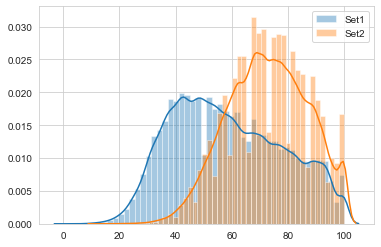

In [11]:
var2hist(df1,'partial_ratio')

In [8]:
df1.head()

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,q1_words,q2_words,len_def,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,partial_ratio,token_sort_ratio
0,0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,14,12,9,...,0.43,0.42,0.36,0.92,0.79,0,1,93,100,93
1,1,1,3,4,What is the story of Kohinoor Koh-i-Noor Diamond,What would happen if the Indian government sto...,0,8,13,37,...,0.23,0.12,0.08,0.50,0.31,0,1,64,71,63
2,2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,14,10,14,...,0.14,0.10,0.07,0.30,0.21,0,1,45,41,63
3,3,3,7,8,Why am I mentally very lonely How can I solve it,find the remainder when math 23 24 math is div...,0,11,13,11,...,0.00,0.00,0.00,0.00,0.00,0,0,9,14,24
4,4,4,9,10,Which one dissolve in water quickly sugar salt...,Which fish would survive in salt water,0,13,7,36,...,0.23,0.14,0.08,0.57,0.31,0,1,37,56,46


In [1]:
df.column

NameError: name 'df' is not defined